<a href="https://colab.research.google.com/github/hsargoli/MyWorks/blob/main/MIDdatascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entropy 
----
https://www.analyticsvidhya.com/blog/2020/11/entropy-a-key-concept-for-all-data-science-beginners/


In 1948, Claude E. Shannon, mathematician, and electrical engineer, published a
paper on A Mathematical Theory of Communication, in which he had addressed the 
issues of measure of information, choice, and uncertainty. Shannon was also known as 
the ‘father of information theory’ as he had invented the field of information theory.

Information theory is a mathematical approach to the study of coding of information along with the quantification, storage, and communication of information

primary measure in information theory is entropy.The English meaning of the word entropy is: it is a state of disorder, confusion, and disorganization

information:
we know that information is some facts learned about something or someone. Notionally, we can understand that information is something that can be stored in, transferred, or passed-on as variables, which can further take different values. In other words, a variable is nothing but a unit of storage. So, we get information from a variable by seeing its value, in the same manner as we get details (or information) from a message or letter by reading its content.

the entropy measures the “amount of information” present in a variable

In information theory, the entropy of a random variable is the average level of “information“, “surprise”, or “uncertainty” inherent in the variable’s possible outcomes.

 In a nutshell, the information is an increase in uncertainty or entropy.

 To understand the objective function, we need to understand how the impurity or the heterogeneity of the target column is computed. There are two metrics to estimate this impurity: Entropy and Gini. In addition to this, to answer the previous question on how the decision tree chooses the attributes, there are various splitting methods including Chi-square, Gini-index, and Entropy. . The uncertainty is expressed as Gini or Entropy.


'''

A Disadvantage of Variance
One of the most commonly discussed disadvantages of variance is that it gives added weight to numbers that are far from the mean, or outliers. Squaring these numbers can at times result in skewed interpretations of the data set as a whole.



```
# Covariance is used to measure variables that have different units of measurement. By leveraging covariance, researchers are able to 
determine whether units are increasing or decreasing, but they are 
unable to solidify the degree to which the variables are moving together due to the fact that covariance does not use one 
standardized unit of measurement.

Correlation, on the other hand, standardizes the measure of interdependence between two variables and informs researchers as to 
how closely the two variables move together.
```



Correlation Coefficient
The correlation coefficient is the term used to refer to the resulting correlation measurement. It will always maintain a value between one and negative one.

When the correlation coefficient is one, the variables under examination have a perfect positive correlation. In other words, when one moves, so does the other in the same direction, proportionally.

If the correlation coefficient is less than one, but still greater than zero, it indicates a less than perfect positive correlation. The closer the correlation coefficient gets to one, the stronger the correlation between the two variables.

When the correlation coefficient is zero, it means that there is no identifiable relationship between the variables. If one variable moves, it’s impossible to make predictions about the movement of the other variable. 

If the correlation coefficient is negative one, this means that the variables are perfectly negatively or inversely correlated. If one variable increases, the other will decrease at the same proportion. The variables will move in opposite directions from each other. 

If the correlation coefficient is greater than negative one, it indicates that there is an imperfect negative correlation. As the correlation approaches negative one, the correlation grows.

In [ ]:
# https://towardsdatascience.com/using-the-chi-squared-test-for-feature-selection-with-implementation-b15a4dad93f1

Chi-Square is to be used when the feature is categorical, the target variable is any way can be thought as categorical. It measures the degree of association between two categorical variables. If both are numeric, we can use Pearson’s product-moment correlation, and if the attribute is numerical and there are two classes we can use a t-test if more than two classes we can use ANOVA

In [14]:
# ................................
# classification info
# ................................

# Actual Value
labels = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]

# Predicted Value
predictions = [0, 1, 1, 1, 1, 0, 1, 0, 1, 0]
# ................................
# 0 - email is NOT spam (negative)
# 1 - email is spam (positive)
# ................................
#      predicted         predicted
# act (true positive) (false negative) 
# act (false positive) (true negative)
# ................................
# Accuracy = (true poseitive + true negative) / TOTAL
# precision = (true positive) / (true positive + false positive)
from sklearn.metrics import accuracy_score
print(accuracy_score(labels , predictions)*100)

# Recall  A case when Accuracy can be misleading
# recall = true positive / (true positive + false negative)
from sklearn.metrics import recall_score
print(recall_score(labels,predictions))

# Precision A Case when Recall Score can be misleading
# precision = true positive / true positive + false positive
from sklearn.metrics import precision_score
print(precision_score(labels,predictions)*100)

# F1 Score depends on both the Recall and Precision, it is the harmonic mean of both the values.#$
# F1 score = pricision * recall / precision + recall 
from sklearn.metrics import f1_score
print(f1_score(labels, predictions))

30.0
0.42857142857142855
50.0
0.4615384615384615


In [15]:
# ------------------------------------
# 
# ------------------------------------
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split

bcd = datasets.load_breast_cancer()
bcdDF = pd.DataFrame(bcd.data)
x = bcd.data
y = bcd.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 42, stratify = y)


knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train, y_train)
knn.score(x_test,y_test)
y_pred = knn.predict(x_test)
# ................................
# ................................
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred),
classification_report(y_test, y_pred))

[[ 57   7]
 [  5 102]]               precision    recall  f1-score   support

           0       0.92      0.89      0.90        64
           1       0.94      0.95      0.94       107

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.985981308411215


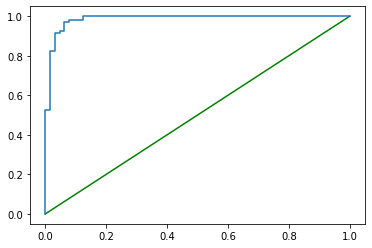

In [16]:
# ................................
# ROC curve
# ................................
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
 
log = LogisticRegression()
log.fit(x_train, y_train)

y_pred = log.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

y_proba = log.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
print(roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], c = 'g')
plt.plot(fpr, tpr)
plt.show()

# Iris dataset

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()
print(f'shape of data = {iris.data.shape}\n iris describe = {iris.DESCR}')


shape of data = (150, 4)
 iris describe = .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ========

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

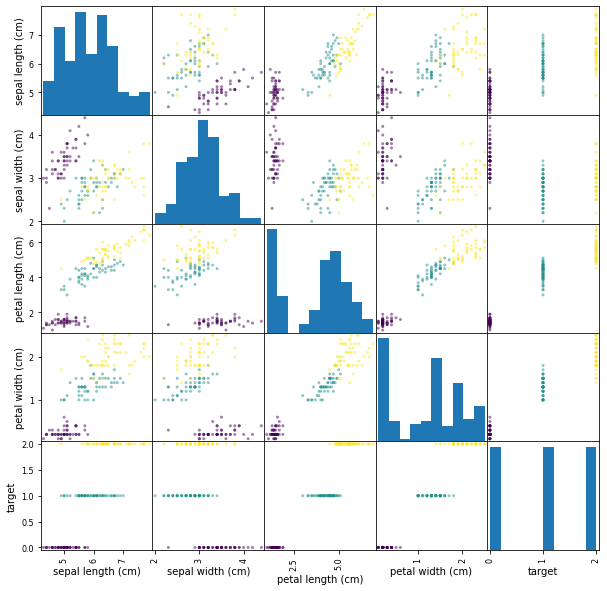

In [3]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
print(iris_df)
pd.plotting.scatter_matrix(iris_df, c=iris.target,figsize = [10,10])
plt.show()

------
# machin learning algorithms
------

In [4]:
# KNN 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 42, stratify = y)


knn = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 1)
'''
p   in the mikowski is like ranke of tensor
if p = 1 --> its turn to manhattan distance
if p = 2 --> its turn to euclidance distance
if p = inf --> its chebyshev.  like king moving in chess
'''

knn.fit(x_train, y_train)
x_n = np.array([[5,4,3,2]])
ypred = knn.predict(x_test)
print(knn.score(x_test, y_test))
print(list(zip(ypred,y_train)))

0.9333333333333333
[(2, 1), (1, 1), (1, 0), (1, 2), (2, 1), (2, 2), (1, 0), (1, 0), (0, 0), (2, 2), (0, 2), (0, 0), (2, 0), (2, 1), (0, 1), (2, 2), (1, 0), (0, 0), (0, 2), (0, 1), (1, 0), (0, 2), (1, 2), (2, 2), (1, 1), (1, 0), (1, 0), (1, 0), (1, 1), (0, 1), (2, 0), (2, 0), (1, 1), (0, 1), (2, 0), (0, 0), (0, 1), (0, 2), (0, 2), (1, 0), (1, 2), (0, 0), (1, 2), (2, 0), (1, 2)]


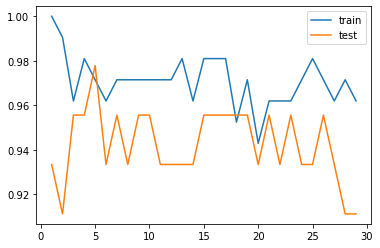

In [5]:
neighbors = np.arange(1,30)
train_acc = np.empty(len(neighbors))
test_acc = np.empty(len(neighbors))

for i,j in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors = j)
  knn.fit(x_train, y_train)
  train_acc[i] = knn.score(x_train, y_train)
  test_acc[i] = knn.score(x_test, y_test)

plt.plot(neighbors, train_acc, label = 'train')
plt.plot(neighbors, test_acc, label = 'test')
plt.legend()

def kmost(x,y,k):
  neighbors = np.arange(1,k)
  train_acc = np.empty(len(neighbors))
  test_acc = np.empty(len(neighbors))

  for i,j in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = j)
    knn.fit(x, y)
    train_acc[i] = knn.score(x, y)
    test_acc[i] = knn.score(x, y)

  plt.plot(neighbors, train_acc, label = 'train')
  plt.plot(neighbors, test_acc, label = 'test')
  plt.legend()

In [6]:
# decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
ypred = dtc.predict(x_test)

metrics.accuracy_score(y_test, ypred)
# or use dtc.score

0.8888888888888888

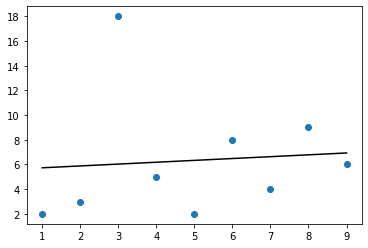

In [7]:
# regression 
from matplotlib.collections import LineCollection
from sklearn.linear_model import LinearRegression

x = np.arange(1,10).reshape(-1,1)
y = np.array([2,3,18,5,2,8,4,9,6]).reshape(-1,1)


reg = LinearRegression()
reg.fit(x,y)

ypred = reg.predict(x)

plt.scatter(x,y)
plt.plot(x,ypred, c = 'k')
plt.show()


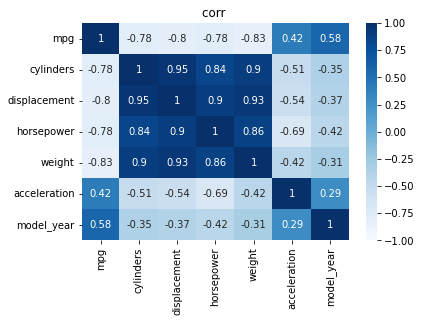

0.5191553121718141  Scores  [ 0.82373409  0.74317391  0.77211659  0.66633808 -0.4095861 ]


10754.525643224079

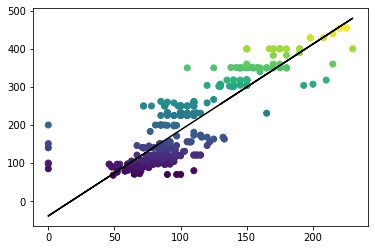

In [12]:
import pandas as pd
from seaborn import load_dataset
import seaborn as sb
data3 = load_dataset("mpg")
corr = data3.corr() # depict correlation between numeric values
a = sb.heatmap(corr, annot = True, cmap='Blues', xticklabels = corr.columns, yticklabels = corr.columns, vmin = -1, vmax = +1)
a.set(title = 'corr ')
plt.show()
data3 = data3.fillna(0) 
a = np.array(data3[data3.columns[3]]).reshape(-1,1)
b = np.array(data3[data3.columns[2]]).reshape(-1,1)

lin_reg = LinearRegression()
lin_reg.fit(a,b)
c = lin_reg.predict(a)
lin_reg.score(a,b)

plt.scatter(a,b, c = b)  #(data3.index,data3[data3.columns[3]], c = data3[data3.columns[6]])
plt.plot(a,c,c = 'k')


from sklearn.metrics import mean_squared_error


# kfold cross validation 
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
cv_score = cross_val_score(reg, a, b, cv=5)
print(np.mean(cv_score),' Scores ',cv_score)


mean_squared_error(a, c)

[-0.78188352 -1.83551559  0.3180678 ]
69.7699075383756


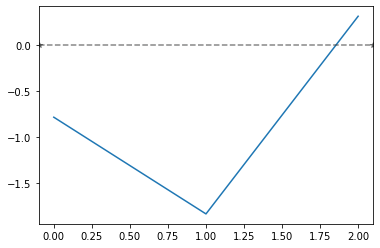

In [13]:
# feature selection !

'''
LASSO, short for Least Absolute Shrinkage and Selection Operator, 
is a statistical formula whose main purpose is the feature 
selection and regularization of data models. 
(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
'''
from sklearn import linear_model

data3 = data3.fillna(0) # replace na with 0


# We want to determine which column is related to the horsePower column using Lasso
y = data3.horsepower
x = data3[data3.columns[:3]] 

clf = linear_model.Lasso(alpha=0.1)  
clf.fit(x,y)
                                            # clf.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])
print(clf.coef_)
print(clf.intercept_)  #?
# ridge ?
plt.plot(range(3),clf.coef_)
plt.axhline(0, linestyle='dashed', color='xkcd:dark grey', alpha=0.6, marker='*')

In [17]:
# HyperParameter Tuning

# Grid search cross-validation
from sklearn.model_selection import GridSearchCV

Hparams = {'n_neighbors':np.arange(1,50)}

knn_cv = GridSearchCV(knn,Hparams, cv = 5)
knn_cv.fit(x_train, y_train)

print(knn_cv.best_params_, knn_cv.best_score_)

{'n_neighbors': 6} 0.9498417721518987


In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
Hparams = {'max_depth':[None,5],
           'max_features': randint(1,9),
           'min_samples_leaf':randint(1,9)}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, Hparams, cv = 5)
tree_cv.fit(x_train, y_train)
print(tree_cv.best_params_)
print(tree_cv.best_score_)

{'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 2}
0.9448417721518988


In [19]:
# kmeans 
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
km.fit(iris.data)
yp = km.predict(iris.data)
print(list(zip(iris.target,yp)))

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 2), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 2), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (2, 2), (2, 1), (2, 2), (2, 2), (2, 2), (2, 2), (2, 1), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 1), (2, 1), (2, 2), (2, 2), (2, 2), (2, 2), (2, 1), (2, 2), (2, 1), (2, 2), (2, 1), (2, 2),